In [1]:
import nvtabular
import cudf
import sys

In [2]:
workflow = nvtabular.Workflow.load("./rossmann_categorify")

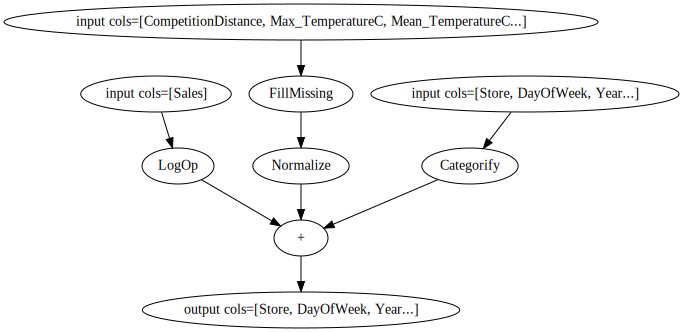

In [3]:
workflow.column_group.graph

In [19]:
import cudf

batch = cudf.read_csv("./data/train.csv", nrows=10000)[workflow.column_group.input_column_names]
batch

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,Sales
0,335,2,2013,1,1,True,0,0,b,a,...,39,26,6.0,63,62,0.0,0.0,0,1,2401
1,353,2,2013,1,1,True,0,0,b,b,...,23,6,6.0,59,62,0.0,0.0,0,1,3139
2,682,2,2013,1,1,True,24,0,b,a,...,26,18,6.0,70,62,0.0,0.0,0,1,3375
3,676,2,2013,1,1,True,24,0,b,b,...,23,14,6.0,73,62,0.0,0.0,0,1,3821
4,769,2,2013,1,1,True,0,4,b,b,...,39,26,6.0,63,62,0.0,0.0,0,1,5035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15,5,2013,1,11,False,24,25,d,c,...,16,10,6.0,57,51,10.0,77.0,1,0,7621
9996,9,5,2013,1,11,False,24,0,a,c,...,21,8,4.0,48,51,10.0,77.0,1,0,5855
9997,619,6,2013,1,12,False,24,25,a,a,...,16,8,7.0,48,51,6.0,76.0,0,0,1787
9998,625,6,2013,1,12,False,21,25,a,a,...,16,6,2.0,48,51,11.0,76.0,0,0,4138


In [7]:
%%time
transformed = workflow.transform(nvtabular.Dataset(batch)).to_ddf().compute()
transformed

CPU times: user 165 ms, sys: 20.1 ms, total: 185 ms
Wall time: 183 ms


,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,Sales
0,335,2,1,1,1,2,1,1,2,1,...,1.819206,2.369487,0.404742,-0.145725,-0.384199,-1.207329,-1.220517,-0.898422,2.083927,7.784057
1,353,2,1,1,1,2,1,1,2,2,...,0.044257,-0.983213,0.404742,-0.508184,-0.384199,-1.207329,-1.220517,-0.898422,2.083927,8.051978
2,682,2,1,1,1,2,25,1,2,1,...,0.377060,1.028407,0.404742,0.488578,-0.384199,-1.207329,-1.220517,-0.898422,2.083927,8.124447
3,676,2,1,1,1,2,25,1,2,2,...,0.044257,0.357867,0.404742,0.760423,-0.384199,-1.207329,-1.220517,-0.898422,2.083927,8.248529
4,769,2,1,1,1,2,1,5,2,2,...,1.819206,2.369487,0.404742,-0.145725,-0.384199,-1.207329,-1.220517,-0.898422,2.083927,8.524367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15,5,1,1,11,1,25,26,4,3,...,-0.732283,-0.312673,0.404742,-0.689414,-1.572412,-0.891470,1.132274,1.113062,-0.479863,8.938794
9996,9,5,1,1,11,1,25,1,1,3,...,-0.177611,-0.647943,-0.499503,-1.504947,-1.572412,-0.891470,1.132274,1.113062,-0.479863,8.675222
9997,619,6,1,1,12,1,25,26,1,1,...,-0.732283,-0.647943,0.856864,-1.504947,-1.572412,-1.017813,1.101719,-0.898422,-0.479863,7.488853
9998,625,6,1,1,12,1,22,26,1,1,...,-0.732283,-0.983213,-1.403748,-1.504947,-1.572412,-0.859884,1.101719,-0.898422,-0.479863,8.328210


In [1]:
import nvtabular.inference.triton
workflow = nvtabular.Workflow.load("./rossmann_hashbucket")
nvtabular.inference.triton.generate_triton_model(workflow, "rossmann_hashbucket", "./models/rossmann_hashbucket")

In [11]:
from tritonclient.utils import *
import tritonclient.grpc as grpcclient
import tritonclient.http as httpclient

# convert the batch to a triton inputs
columns = [(col, batch[col]) for col in workflow.column_group.input_column_names]
inputs = [httpclient.InferInput(name, col.shape, np_to_triton_dtype(col.dtype)) for name, col in columns]
for i, (name, col) in enumerate(columns):
    inputs[i].set_data_from_numpy(col.values_host)
    
# placeholder variables for the output
outputs = [httpclient.InferRequestedOutput(name) for name in workflow.column_group.columns]

# make the request
with httpclient.InferenceServerClient("localhost:8000") as client:
    response = client.infer("rossmann", inputs, request_id="1",outputs=outputs)
    
output = cudf.DataFrame({col: response.as_numpy(col) for col in workflow.column_group.columns})
output


,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,Sales
0,335,2,1,1,1,2,1,1,2,1,...,1.819206,2.369487,0.404742,-0.145725,-0.384199,-1.207329,-1.220517,-0.898422,2.083927,7.784057
1,353,2,1,1,1,2,1,1,2,2,...,0.044257,-0.983213,0.404742,-0.508184,-0.384199,-1.207329,-1.220517,-0.898422,2.083927,8.051978
2,682,2,1,1,1,2,25,1,2,1,...,0.377060,1.028407,0.404742,0.488578,-0.384199,-1.207329,-1.220517,-0.898422,2.083927,8.124447
3,676,2,1,1,1,2,25,1,2,2,...,0.044257,0.357867,0.404742,0.760423,-0.384199,-1.207329,-1.220517,-0.898422,2.083927,8.248529
4,769,2,1,1,1,2,1,5,2,2,...,1.819206,2.369487,0.404742,-0.145725,-0.384199,-1.207329,-1.220517,-0.898422,2.083927,8.524367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,914,3,1,1,2,1,21,26,3,3,...,0.377060,1.531312,-0.499503,0.669808,-0.384199,-1.175743,1.407276,-0.898422,2.083927,9.152287
96,918,3,1,1,2,1,1,1,1,3,...,0.709863,1.028407,0.404742,0.579193,-0.384199,-1.175743,1.407276,-0.898422,2.083927,8.405591
97,922,3,1,1,2,1,25,1,4,1,...,0.155192,0.693137,0.404742,-0.145725,-0.384199,-1.175743,1.407276,-0.898422,2.083927,8.756210
98,896,3,1,1,2,1,4,1,1,3,...,0.377060,1.531312,-0.499503,0.669808,-0.384199,-1.175743,1.407276,-0.898422,2.083927,8.806574


In [12]:
# transformed = workflow.transform(nvtabular.Dataset(batch)).to_ddf().compute()
transformed = nvtabular.workflow._transform_partition(batch, [workflow.column_group])
transformed

transform testop ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen', 'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear', 'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw', 'SchoolHoliday_fw', 'SchoolHoliday_bw', 'CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC', 'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE', 'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday', 'Sales']


,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,Sales
0,335,2,1,1,1,2,1,1,2,1,...,1.819206,2.369487,0.404742,-0.145725,-0.384199,-1.207329,-1.220517,-0.898422,2.083927,7.784057
1,353,2,1,1,1,2,1,1,2,2,...,0.044257,-0.983213,0.404742,-0.508184,-0.384199,-1.207329,-1.220517,-0.898422,2.083927,8.051978
2,682,2,1,1,1,2,25,1,2,1,...,0.377060,1.028407,0.404742,0.488578,-0.384199,-1.207329,-1.220517,-0.898422,2.083927,8.124447
3,676,2,1,1,1,2,25,1,2,2,...,0.044257,0.357867,0.404742,0.760423,-0.384199,-1.207329,-1.220517,-0.898422,2.083927,8.248529
4,769,2,1,1,1,2,1,5,2,2,...,1.819206,2.369487,0.404742,-0.145725,-0.384199,-1.207329,-1.220517,-0.898422,2.083927,8.524367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,914,3,1,1,2,1,21,26,3,3,...,0.377060,1.531312,-0.499503,0.669808,-0.384199,-1.175743,1.407276,-0.898422,2.083927,9.152287
96,918,3,1,1,2,1,1,1,1,3,...,0.709863,1.028407,0.404742,0.579193,-0.384199,-1.175743,1.407276,-0.898422,2.083927,8.405591
97,922,3,1,1,2,1,25,1,4,1,...,0.155192,0.693137,0.404742,-0.145725,-0.384199,-1.175743,1.407276,-0.898422,2.083927,8.756210
98,896,3,1,1,2,1,4,1,1,3,...,0.377060,1.531312,-0.499503,0.669808,-0.384199,-1.175743,1.407276,-0.898422,2.083927,8.806574


,batchsize,local (ms),triton (ms)
0,1,38.973990,119.710368
1,2,38.631964,127.389311
2,4,38.461646,119.088582
3,8,38.696890,111.804049
4,16,38.525232,118.063576
5,32,38.808219,125.615866
6,64,38.750898,115.609526
7,128,38.397069,118.733846
8,256,38.854256,124.925671
9,512,38.964271,134.770324


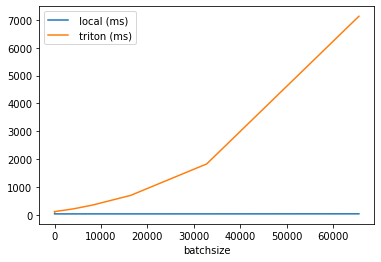

In [14]:
import pandas

hash_bucket = pandas.read_csv("rossmann_hashbucket.csv")
hash_bucket.plot(x="batchsize")
hash_bucket

,batchsize,local (ms),triton (ms)
0,1,97.843591,213.613406
1,2,97.765021,212.746640
2,4,97.485200,221.096762
3,8,99.525427,226.075631
4,16,99.694623,226.967856
5,32,100.114787,221.385887
6,64,98.760391,224.500452
7,128,99.301835,219.591640
8,256,100.839361,231.097673
9,512,102.018723,229.226426


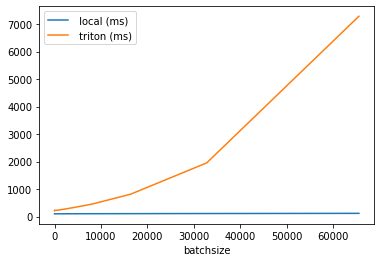

In [15]:
import pandas
import matplotlib
categorify = pandas.read_csv("rossmann_categorify.csv")
categorify.plot(x="batchsize")
categorify